In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
import os

In [10]:
os.listdir("data")

['data_kmeans.csv',
 'data_kmeans_replace.csv',
 'data_n.csv',
 'test',
 'test.txt',
 'UnlabeledWiDS2021.csv']

In [11]:
data = pd.read_csv("data/UnlabeledWiDS2021.csv")

In [12]:
print(data.shape)
data.head()

(10234, 180)


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [14]:
data = data.drop("Unnamed: 0", axis=1)
data["target"] = data["solid_tumor_with_metastasis"]
data = data.drop("solid_tumor_with_metastasis", axis=1)

In [15]:
for i in data.columns:
    print(i)

encounter_id
hospital_id
age
bmi
elective_surgery
ethnicity
gender
height
hospital_admit_source
icu_admit_source
icu_id
icu_stay_type
icu_type
pre_icu_los_days
readmission_status
weight
albumin_apache
apache_2_diagnosis
apache_3j_diagnosis
apache_post_operative
arf_apache
bilirubin_apache
bun_apache
creatinine_apache
fio2_apache
gcs_eyes_apache
gcs_motor_apache
gcs_unable_apache
gcs_verbal_apache
glucose_apache
heart_rate_apache
hematocrit_apache
intubated_apache
map_apache
paco2_apache
paco2_for_ph_apache
pao2_apache
ph_apache
resprate_apache
sodium_apache
temp_apache
urineoutput_apache
ventilated_apache
wbc_apache
d1_diasbp_invasive_max
d1_diasbp_invasive_min
d1_diasbp_max
d1_diasbp_min
d1_diasbp_noninvasive_max
d1_diasbp_noninvasive_min
d1_heartrate_max
d1_heartrate_min
d1_mbp_invasive_max
d1_mbp_invasive_min
d1_mbp_max
d1_mbp_min
d1_mbp_noninvasive_max
d1_mbp_noninvasive_min
d1_resprate_max
d1_resprate_min
d1_spo2_max
d1_spo2_min
d1_sysbp_invasive_max
d1_sysbp_invasive_min
d1_sysbp

In [16]:
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

# age

In [17]:
data.loc[data['age']==70].loc[data['target']==0]

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,target
33,145818,10181,70,NaN,0,Caucasian,M,177.8,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
45,142966,10181,70,NaN,1,Caucasian,M,180.3,Operating Room,Operating Room / Recovery,...,NaN,NaN,NaN,0,0,0,0,0,0,0
68,135018,10064,70,NaN,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
272,138325,10003,70,NaN,0,Caucasian,F,152.4,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
302,136623,10003,70,NaN,0,Caucasian,F,165.1,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,140018,10078,70,37.2,1,African American,F,165.1,Operating Room,Operating Room / Recovery,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10016,142515,10078,70,27.5,1,Caucasian,M,177.8,Operating Room,Operating Room / Recovery,...,348.0,348.0,348.0,0,0,0,0,0,0,0
10136,139959,10078,70,27.6,0,Caucasian,F,162.6,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10154,145613,10078,70,36.7,0,African American,M,175.3,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0


sum:  181
     count      mean  median  sum
age                              
70     248  0.004032     0.0    1
74     246  0.024390     0.0    6
66     240  0.020833     0.0    5
65     237  0.025316     0.0    6
73     236  0.021186     0.0    5
71     231  0.021645     0.0    5
69     229  0.013100     0.0    3
68     228  0.013158     0.0    3
63     219  0.022831     0.0    5
67     218  0.013761     0.0    3
75     216  0.037037     0.0    8
81     214  0.014019     0.0    3
59     210  0.028571     0.0    6
58     206  0.019417     0.0    4
72     206  0.038835     0.0    8
76     205  0.019512     0.0    4
57     197  0.015228     0.0    3
77     196  0.020408     0.0    4
55     195  0.035897     0.0    7
82     190  0.015789     0.0    3
62     190  0.000000     0.0    0
56     189  0.026455     0.0    5
64     188  0.026596     0.0    5
54     186  0.037634     0.0    7
79     184  0.010870     0.0    2


<AxesSubplot:xlabel='age', ylabel='count'>

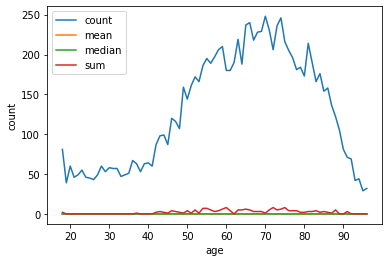

In [18]:
data_age_1 = data.groupby(["age"])["target"].agg(["count", "mean", "median", "sum"])
data_age_1.head()
print("sum: ",data_age_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_age_1.sort_values("count",ascending=False).head(25))
data_age_1.sort_values("age",ascending=False).plot(ylabel="count")

In [19]:
data["target"] = data["target"].replace({1:0, 0:1})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

sum:  10053
     count      mean  median  sum
age                              
70     248  0.995968     1.0  247
74     246  0.975610     1.0  240
66     240  0.979167     1.0  235
65     237  0.974684     1.0  231
73     236  0.978814     1.0  231
71     231  0.978355     1.0  226
69     229  0.986900     1.0  226
68     228  0.986842     1.0  225
63     219  0.977169     1.0  214
67     218  0.986239     1.0  215
75     216  0.962963     1.0  208
81     214  0.985981     1.0  211
59     210  0.971429     1.0  204
58     206  0.980583     1.0  202
72     206  0.961165     1.0  198
76     205  0.980488     1.0  201
57     197  0.984772     1.0  194
77     196  0.979592     1.0  192
55     195  0.964103     1.0  188
82     190  0.984211     1.0  187
62     190  1.000000     1.0  190
56     189  0.973545     1.0  184
64     188  0.973404     1.0  183
54     186  0.962366     1.0  179
79     184  0.989130     1.0  182


<AxesSubplot:xlabel='age', ylabel='count'>

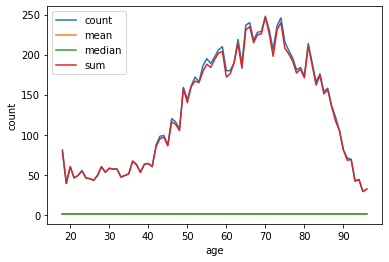

In [20]:
data_age_0 = data.groupby(["age"])["target"].agg(["count", "mean", "median", "sum"])
data_age_0.head()
print("sum: ",data_age_0["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_age_0.sort_values("count",ascending=False).head(25))
data_age_0.sort_values("age",ascending=False).plot(ylabel = "count")

In [21]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

* в датасете приобладают люди пенсионнго возраста, видисмо молодые не обращаются в мед учреждения с данной проблеммой так если брать статистику данного датасета, то 70 летних, таких 248 человек, здоровых среди них менее одного процента от данной совокупности, 247 являюстся заболевшими

# bmi
## Индекс массы тела

sum:  181
      count      mean  median  sum
bmi                               
NaN    1015  0.019704     0.0   20
26.6     96  0.020833     0.0    2
25.8     84  0.011905     0.0    1
25.1     79  0.012658     0.0    1
27.5     79  0.050633     0.0    4
23.7     79  0.012658     0.0    1
27.4     78  0.038462     0.0    3
24.4     76  0.013158     0.0    1
27.1     73  0.027397     0.0    2
23.0     73  0.000000     0.0    0
28.3     72  0.013889     0.0    1
24.2     72  0.013889     0.0    1
24.6     67  0.014925     0.0    1
24.8     66  0.030303     0.0    2
26.0     65  0.046154     0.0    3
28.1     64  0.015625     0.0    1
29.3     63  0.015873     0.0    1
28.0     63  0.031746     0.0    2
27.3     63  0.015873     0.0    1
25.7     62  0.000000     0.0    0
24.5     62  0.048387     0.0    3
23.6     62  0.016129     0.0    1
25.2     62  0.000000     0.0    0
25.9     61  0.016393     0.0    1
25.4     60  0.000000     0.0    0


<AxesSubplot:xlabel='bmi', ylabel='count'>

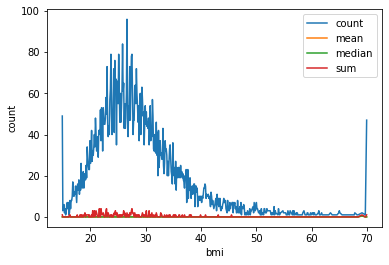

In [22]:
# здоровые
data_bmi_0 = data.groupby(["bmi"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])
data_bmi_0.head()
print("sum: ",data_bmi_0["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_bmi_0.sort_values("count",ascending=False).head(25))
data_bmi_0.sort_values("bmi",ascending=False).plot(ylabel = "count")

In [23]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

sum:  10053
      count      mean  median  sum
bmi                               
NaN    1015  0.980296     1.0  995
26.6     96  0.979167     1.0   94
25.8     84  0.988095     1.0   83
25.1     79  0.987342     1.0   78
27.5     79  0.949367     1.0   75
23.7     79  0.987342     1.0   78
27.4     78  0.961538     1.0   75
24.4     76  0.986842     1.0   75
27.1     73  0.972603     1.0   71
23.0     73  1.000000     1.0   73
28.3     72  0.986111     1.0   71
24.2     72  0.986111     1.0   71
24.6     67  0.985075     1.0   66
24.8     66  0.969697     1.0   64
26.0     65  0.953846     1.0   62
28.1     64  0.984375     1.0   63
29.3     63  0.984127     1.0   62
28.0     63  0.968254     1.0   61
27.3     63  0.984127     1.0   62
25.7     62  1.000000     1.0   62
24.5     62  0.951613     1.0   59
23.6     62  0.983871     1.0   61
25.2     62  1.000000     1.0   62
25.9     61  0.983607     1.0   60
25.4     60  1.000000     1.0   60


<AxesSubplot:xlabel='bmi', ylabel='count'>

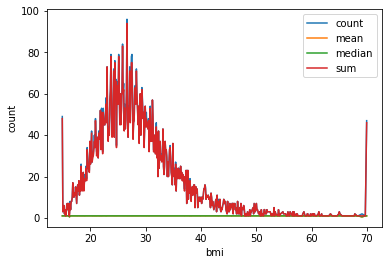

In [24]:
# заболевшие
data_bmi_1 = data.groupby(["bmi"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])
data_bmi_1.head()
print("sum: ",data_bmi_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_bmi_1.sort_values("count",ascending=False).head(25))
data_bmi_1.sort_values("bmi",ascending=False).plot(ylabel = "count")

In [25]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

# weight

sum:  181
         count      mean  median  sum
weight                               
NaN        908  0.018722     0.0   17
68.000     123  0.008130     0.0    1
81.600     116  0.043103     0.0    5
77.100     110  0.018182     0.0    2
90.700      89  0.011236     0.0    1
72.600      83  0.024096     0.0    2
63.500      83  0.000000     0.0    0
75.000      75  0.013333     0.0    1
70.000      64  0.031250     0.0    2
80.000      63  0.000000     0.0    0
59.000      60  0.016667     0.0    1
86.200      54  0.018519     0.0    1
100.000     53  0.000000     0.0    0
83.900      50  0.000000     0.0    0
79.400      49  0.000000     0.0    0
38.100      49  0.040816     0.0    2
74.800      48  0.000000     0.0    0
188.009     47  0.042553     0.0    2
90.000      45  0.022222     0.0    1
60.000      45  0.022222     0.0    1
85.000      44  0.045455     0.0    2
73.000      43  0.023256     0.0    1
104.300     43  0.000000     0.0    0
70.300      42  0.023810     0.0    1
86

<AxesSubplot:xlabel='weight', ylabel='count'>

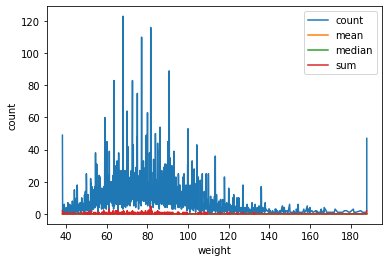

In [26]:
# здоровые
data_weight_1 = data.groupby(["weight"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_weight_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_weight_1.sort_values("count",ascending=False).head(25))
data_weight_1.sort_values("weight",ascending=False).plot(ylabel = "count")

In [27]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

sum:  10053
         count      mean  median  sum
weight                               
NaN        908  0.981278     1.0  891
68.000     123  0.991870     1.0  122
81.600     116  0.956897     1.0  111
77.100     110  0.981818     1.0  108
90.700      89  0.988764     1.0   88
72.600      83  0.975904     1.0   81
63.500      83  1.000000     1.0   83
75.000      75  0.986667     1.0   74
70.000      64  0.968750     1.0   62
80.000      63  1.000000     1.0   63
59.000      60  0.983333     1.0   59
86.200      54  0.981481     1.0   53
100.000     53  1.000000     1.0   53
83.900      50  1.000000     1.0   50
79.400      49  1.000000     1.0   49
38.100      49  0.959184     1.0   47
74.800      48  1.000000     1.0   48
188.009     47  0.957447     1.0   45
90.000      45  0.977778     1.0   44
60.000      45  0.977778     1.0   44
85.000      44  0.954545     1.0   42
73.000      43  0.976744     1.0   42
104.300     43  1.000000     1.0   43
70.300      42  0.976190     1.0   41


<AxesSubplot:xlabel='weight', ylabel='count'>

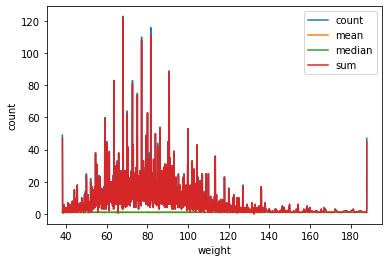

In [28]:
# заболевшие
data_weight_0 = data.groupby(["weight"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_weight_0["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_weight_0.sort_values("count",ascending=False).head(25))
data_weight_0.sort_values("weight",ascending=False).plot(ylabel = "count")

In [29]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

# weight bmi

sum:  181
                count      mean  median  sum
weight  bmi                                 
NaN     NaN       908  0.018722     0.0   17
38.100  14.900     31  0.000000     0.0    0
188.009 69.944     18  0.055556     0.0    1
68.000  23.500     15  0.000000     0.0    0
77.100  24.400     14  0.000000     0.0    0
81.600  27.400     14  0.142857     0.0    2
        24.400     13  0.076923     0.0    1
        25.800     13  0.076923     0.0    1
90.700  27.100     12  0.000000     0.0    0
63.500  22.600     11  0.000000     0.0    0
90.700  27.900     11  0.000000     0.0    0
68.000  22.800     11  0.000000     0.0    0
81.600  29.900     11  0.000000     0.0    0
68.000  26.600     10  0.000000     0.0    0
81.600  28.200     10  0.000000     0.0    0
63.500  24.800     10  0.000000     0.0    0
70.000  24.200      9  0.000000     0.0    0
77.100  26.600      9  0.000000     0.0    0
        23.700      9  0.000000     0.0    0
        28.300      9  0.000000     0.0    0


<AxesSubplot:xlabel='weight,bmi', ylabel='count'>

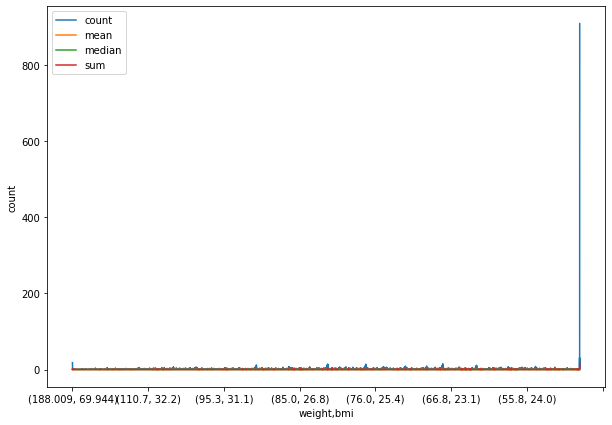

In [30]:
# здоровые
data_weight_bmi_0 = data.groupby(["weight", "bmi"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_weight_bmi_0["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_weight_bmi_0.sort_values("count",ascending=False).head(25))
data_weight_bmi_0.sort_values(["weight", "bmi"],ascending=False).plot(figsize=(10, 7),ylabel = "count")

In [31]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

sum:  10053
                count      mean  median  sum
weight  bmi                                 
NaN     NaN       908  0.981278     1.0  891
38.100  14.900     31  1.000000     1.0   31
188.009 69.944     18  0.944444     1.0   17
68.000  23.500     15  1.000000     1.0   15
77.100  24.400     14  1.000000     1.0   14
81.600  27.400     14  0.857143     1.0   12
        24.400     13  0.923077     1.0   12
        25.800     13  0.923077     1.0   12
90.700  27.100     12  1.000000     1.0   12
63.500  22.600     11  1.000000     1.0   11
90.700  27.900     11  1.000000     1.0   11
68.000  22.800     11  1.000000     1.0   11
81.600  29.900     11  1.000000     1.0   11
68.000  26.600     10  1.000000     1.0   10
81.600  28.200     10  1.000000     1.0   10
63.500  24.800     10  1.000000     1.0   10
70.000  24.200      9  1.000000     1.0    9
77.100  26.600      9  1.000000     1.0    9
        23.700      9  1.000000     1.0    9
        28.300      9  1.000000     1.0    

<AxesSubplot:xlabel='weight,bmi', ylabel='count'>

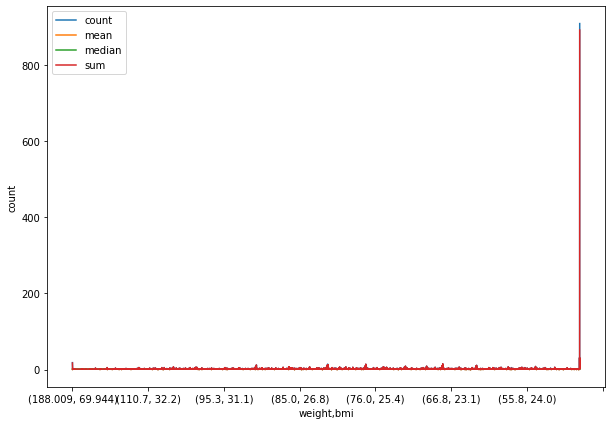

In [32]:
# заболевшие
data_weight_bmi_1 = data.groupby(["weight", "bmi"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_weight_bmi_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_weight_bmi_1.sort_values("count",ascending=False).head(25))
data_weight_bmi_1.sort_values(["weight", "bmi"],ascending=False).plot(figsize=(10, 7),ylabel = "count")

In [33]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

# aids
## инфекция

In [34]:
data.shape

(10234, 179)

sum:  181
      count      mean  median  sum
aids                              
0     10224  0.017606     0.0  180
1        10  0.100000     0.0    1


<AxesSubplot:xlabel='aids', ylabel='count'>

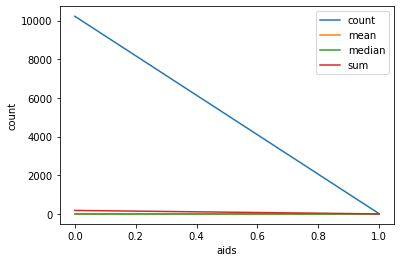

In [35]:
# здоровые
data_aids_0 = data.groupby(["aids"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_aids_0["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_aids_0.sort_values("count",ascending=False).head(25))
data_aids_0.sort_values("aids",ascending=False).plot(ylabel = "count")

In [36]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

sum:  10053
             count  mean  median    sum
aids target                            
0    1       10044   1.0     1.0  10044
     0         180   0.0     0.0      0
1    1           9   1.0     1.0      9
     0           1   0.0     0.0      0


<AxesSubplot:xlabel='aids,target', ylabel='count'>

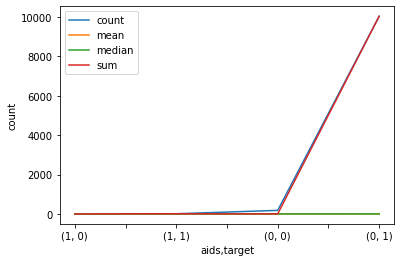

In [37]:
# заболевшие
data_aids_1 = data.groupby(["aids","target"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_aids_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_aids_1.sort_values("count",ascending=False).head(25))
data_aids_1.sort_values("aids",ascending=False).plot(ylabel = "count")

In [38]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

In [39]:
print("отсутствие вируса: ",180/10044 * 100)
print("наличие вируса: ",1/9 * 100)

отсутствие вируса:  1.7921146953405016
наличие вируса:  11.11111111111111


* по таблице видно, что отсутствие вируса и положительный таргет, 10044 наблюдения и 180 отрицательная опухоль
* наличие вируса, 9 положительный таргет и 1 отрицательный


# cirrhosis
## цироз печени

sum:  181
                  count  mean  median  sum
cirrhosis target                          
0         0        9933   0.0     0.0    0
          1         178   1.0     1.0  178
1         0         120   0.0     0.0    0
          1           3   1.0     1.0    3


<AxesSubplot:xlabel='cirrhosis,target', ylabel='count'>

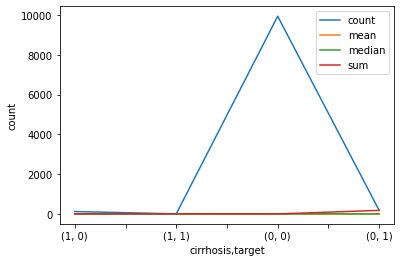

In [40]:
# здоровые
data_cirrhosis_1 = data.groupby(["cirrhosis","target"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_cirrhosis_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_cirrhosis_1.sort_values("count",ascending=False).head(25))
data_cirrhosis_1.sort_values("cirrhosis",ascending=False).plot(ylabel = "count")

In [41]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

In [42]:
# заболевшие
data_cirrhosis_0 = data.groupby(["cirrhosis","target"])["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_cirrhosis_0["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_cirrhosis_0.sort_values("count",ascending=False).head(25))
# data_cirrhosis_0.sort_values("cirrhosis",ascending=False).plot(ylabel = "count")

sum:  10053
                  count  mean  median   sum
cirrhosis target                           
0         1        9933   1.0     1.0  9933
          0         178   0.0     0.0     0
1         1         120   1.0     1.0   120
          0           3   0.0     0.0     0


In [43]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

In [44]:
print("статистика относительно кол-ва наблюдений")
print("отсутствие цироза печени: ",178/9933 * 100, "% здоровых")
print("наличие цироза печени: ",3/120 * 100, "% здоровых")


статистика относительно кол-ва наблюдений
отсутствие цироза печени:  1.7920064431692337 % здоровых
наличие цироза печени:  2.5 % здоровых


* отсутствие цироза печени, отсутствие опухоли 178 человек
* наличие цироза печени, отсутствие опухоли 3 человека
* отсутствие цироза печени, наличие опухоли 9933 человека
* наличие цироза печени, наличие опухоли 120 человека
* Вывод: кол-во здоровых больше если присутствует цироз печени

# hepatic_failure
* Печеночная недостаточность — комплекс симптомов, характеризующийся нарушением одной или нескольких функций печени, появляющийся вследствие повреждения ее паренхимы

In [45]:
# здоровые
data_hepatic_failure_0 = data.groupby(["hepatic_failure","target"])["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_hepatic_failure_0["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_hepatic_failure_0.sort_values("count",ascending=False).head(25))
# data_hepatic_failure_0.sort_values("hepatic_failure",ascending=False).plot(ylabel = "count")

sum:  181
                        count  mean  median  sum
hepatic_failure target                          
0               0        9951   0.0     0.0    0
                1         180   1.0     1.0  180
1               0         102   0.0     0.0    0
                1           1   1.0     1.0    1


In [46]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

In [47]:
# заболевшие
data_hepatic_failure_1 = data.groupby(["hepatic_failure","target"])["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_hepatic_failure_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_hepatic_failure_1.sort_values("count",ascending=False).head(25))
# data_hepatic_failure_1.sort_values("hepatic_failure",ascending=False).plot(ylabel = "count")

sum:  10053
                        count  mean  median   sum
hepatic_failure target                           
0               1        9951   1.0     1.0  9951
                0         180   0.0     0.0     0
1               1         102   1.0     1.0   102
                0           1   0.0     0.0     0


In [48]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

0    10053
1      181
Name: target, dtype: int64

In [49]:
print("статистика относительно кол-ва наблюдений")
print("отсутствие печеночной недостаточности: ",180/9951 * 100, "% здоровых")
print("наличие печеночной недостаточности: ",1/102 * 100, "% здоровых")


статистика относительно кол-ва наблюдений
отсутствие печеночной недостаточности:  1.808863430810974 % здоровых
наличие печеночной недостаточности:  0.9803921568627451 % здоровых


* отсутствие печеночной недостаточности, отсутствие опухоли 180 человек
* наличие печеночной недостаточности, отсутствие опухоли 1 человека
* отсутствие печеночной недостаточности, наличие опухоли 9951 человека
* наличие печеночной недостаточности, наличие опухоли 102 человека
* Вывод: кол-во здоровых больше если отсутствует печеночная недостаточность

# immunosuppression
## иммуносупрессия

In [50]:
data["target"] = data["target"].replace({0:1, 1:0})
data["target"].value_counts()

1    10053
0      181
Name: target, dtype: int64

In [51]:
# заболевшие
data_immunosuppression_1 = data.groupby(["immunosuppression","target"])["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_immunosuppression_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_immunosuppression_1.sort_values("count",ascending=False).head(25))
# data_hepatic_failure_1.sort_values("immunosuppression",ascending=False).plot(ylabel = "count")

sum:  10053
                          count  mean  median   sum
immunosuppression target                           
0                 1        9882   1.0     1.0  9882
1                 1         171   1.0     1.0   171
0                 0         121   0.0     0.0     0
1                 0          60   0.0     0.0     0


In [52]:
print("статистика относительно кол-ва наблюдений")
print("отсутствие иммуносупрессии: ",121/9882 * 100, "% здоровых")
print("наличие иммуносупрессии: ",60/171 * 100, "% здоровых")


статистика относительно кол-ва наблюдений
отсутствие иммуносупрессии:  1.224448492208055 % здоровых
наличие иммуносупрессии:  35.08771929824561 % здоровых


* отсутствие иммуносупрессии, отсутствие опухоли 121 человек
* наличие иммуносупрессии, отсутствие опухоли 60 человека
* отсутствие иммуносупрессии, наличие опухоли 9882 человека
* наличие иммуносупрессии, наличие опухоли 171 человека
* Вывод: кол-во здоровых больше если присутствует иммуносупрессия

In [53]:
data.columns

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min',
       'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'target'],
      dtype='object', length=179)

# leukemia
## лейкемия

In [54]:
# заболевшие
data_leukemia_1 = data.groupby(["leukemia","target"])["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_leukemia_1["sum"].sum())
# data_age['mean'] = data_age['mean'] * 100
print(data_leukemia_1.sort_values("count",ascending=False).head(25))
# data_hepatic_failure_1.sort_values("immunosuppression",ascending=False).plot(ylabel = "count")

sum:  10053
                 count  mean  median   sum
leukemia target                           
0        1        9989   1.0     1.0  9989
         0         178   0.0     0.0     0
1        1          64   1.0     1.0    64
         0           3   0.0     0.0     0


In [55]:
print("статистика относительно кол-ва наблюдений")
print("отсутствие лейкемии: ",178/9989 * 100, "% здоровых")
print("наличие лейкемии: ",3/64 * 100, "% здоровых")


статистика относительно кол-ва наблюдений
отсутствие лейкемии:  1.7819601561717888 % здоровых
наличие лейкемии:  4.6875 % здоровых


* отсутствие лейкемии, отсутствие опухоли 178 человек
* наличие лейкемии, отсутствие опухоли 3 человека
* отсутствие лейкемии, наличие опухоли 9989 человека
* наличие лейкемии, наличие опухоли 64 человека
* Вывод: кол-во здоровых больше если присутствует лейкемия

# lymphoma
## лимфома

In [56]:
# заболевшие
data_lymphoma_1 = data.groupby(["lymphoma","target"])["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_lymphoma_1["sum"].sum())
print(data_lymphoma_1.sort_values("count",ascending=False).head(25))


sum:  10053
                 count  mean  median    sum
lymphoma target                            
0        1       10013   1.0     1.0  10013
         0         179   0.0     0.0      0
1        1          40   1.0     1.0     40
         0           2   0.0     0.0      0


In [57]:
print("статистика относительно кол-ва наблюдений")
print("отсутствие лимфомии: ",179/10013 * 100, "% здоровых")
print("наличие лимфомии: ",2/40 * 100, "% здоровых")


статистика относительно кол-ва наблюдений
отсутствие лимфомии:  1.7876760211724758 % здоровых
наличие лимфомии:  5.0 % здоровых


* отсутствие лимфомии, отсутствие опухоли 179 человек
* наличие лимфомии, отсутствие опухоли 2 человека
* отсутствие лимфомии, наличие опухоли 10013 человека
* наличие лимфомии, наличие опухоли 40 человека
* Вывод: кол-во здоровых больше если присутствует лимфомия

# gender
## пол


In [58]:
data["gender"].value_counts()

M    5525
F    4704
Name: gender, dtype: int64

In [62]:
# заболевшие
data_gender_1 = data.groupby(["gender","target"], dropna=False)["target"].agg(["count", "mean", "median", "sum"])

print("sum: ",data_gender_1["sum"].sum())
print(data_gender_1.sort_values("count",ascending=False).head(25))


sum:  10053
               count  mean  median   sum
gender target                           
M      1        5443   1.0     1.0  5443
F      1        4605   1.0     1.0  4605
       0          99   0.0     0.0     0
M      0          82   0.0     0.0     0
NaN    1           5   1.0     1.0     5


In [61]:
print("статистика относительно кол-ва наблюдений")
print("мужчины: ",82/5443 * 100, "% здоровых")
print("женщины: ",99/4605 * 100, "% здоровых")


статистика относительно кол-ва наблюдений
мужчины:  1.506522138526548 % здоровых
женщины:  2.1498371335504887 % здоровых


* Исходя из этого датасета, женщины менее предрасположены к данному заболеванию